# A few ways to represent density in a scatter plot

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

colorset = ['#000000','#00270C','#00443C','#005083',
            '#034BCA','#483CFC','#9C2BFF','#EB24F4',
            '#FF2DC2','#FF4986','#FF7356','#FFA443',
            '#EBD155','#D3F187','#D7FFC8','#FFFFFF']

Making some correlated points scattered around:

In [2]:
np.random.seed(46)
n = 5000
x = st.norm(10,1).rvs(n)
y = st.norm(x,1).rvs(n)

## Scatter plot

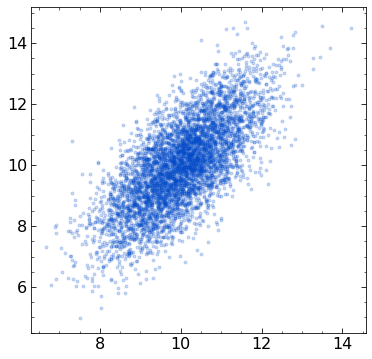

In [65]:
fig = plt.figure(figsize=(6,6))
ax0 = plt.subplot2grid((1,1),(0,0),fig=fig,rowspan=2)
ax0.plot(x,y,'.',color=colorset[4],alpha=0.2)
ax0.minorticks_on()
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='both', which='major', length=5)
ax0.tick_params(axis='both', which='minor', length=2.5)
ax0.tick_params(axis='both', which='both',direction='in',right=True,top=True)

## Hexbin plot

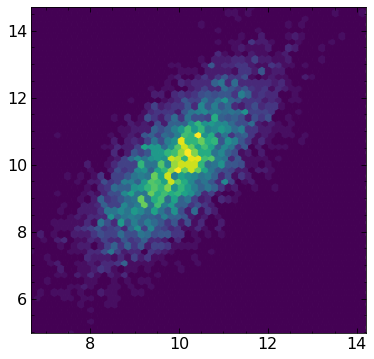

In [66]:
fig = plt.figure(figsize=(6,6))
ax0 = plt.subplot2grid((1,1),(0,0),fig=fig,rowspan=2)
ax0.hexbin(x,y,gridsize=50)
ax0.set(xlim=(min(x),max(x)),ylim=(min(y),max(y)))
ax0.minorticks_on()
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='both', which='major', length=5)
ax0.tick_params(axis='both', which='minor', length=2.5)
ax0.tick_params(axis='both', which='both',direction='in',right=True,top=True)

## 2D-histogram

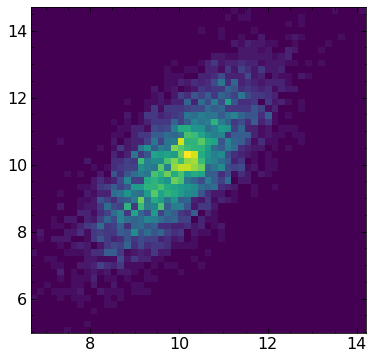

In [67]:
fig = plt.figure(figsize=(6,6))
ax0 = plt.subplot2grid((1,1),(0,0),fig=fig,rowspan=2)
ax0.hist2d(x,y,bins=50)
ax0.minorticks_on()
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='both', which='major', length=5)
ax0.tick_params(axis='both', which='minor', length=2.5)
ax0.tick_params(axis='both', which='both',direction='in',right=True,top=True)

## Contour plot

This one needs a bit of preparation as you need to estimate the "density" (i.e., number of scattered points per unit area). Here is a rather quick way to do it.

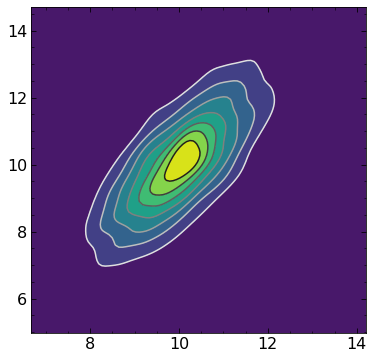

In [3]:
def density_estimation(m1, m2):
    X, Y = np.mgrid[min(m1):max(m1):100j, min(m2):max(m2):100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([m1, m2])
    kernel = st.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z
X,Y,Z = density_estimation(x,y)

fig = plt.figure(figsize=(6,6))
ax0 = plt.subplot2grid((1,1),(0,0),fig=fig,rowspan=2)
ax0.contour(X,Y,Z,cmap='gray_r')
ax0.contourf(X,Y,Z,cmap='viridis')
ax0.minorticks_on()
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='both', which='major', length=5)
ax0.tick_params(axis='both', which='minor', length=2.5)
ax0.tick_params(axis='both', which='both',direction='in',right=True,top=True)

## Mixing it up! Let's mix the types above together

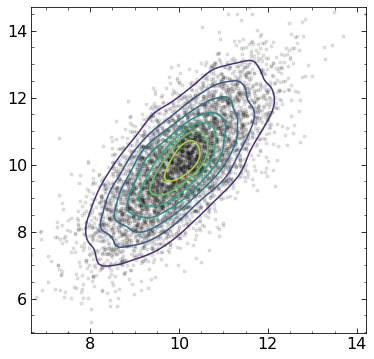

In [4]:
fig = plt.figure(figsize=(6,6))
ax0 = plt.subplot2grid((1,1),(0,0),fig=fig,rowspan=2)
ax0.plot(x,y,'.',color=colorset[0],alpha=0.1)
ax0.contour(X,Y,Z,cmap='viridis',zorder=10)
ax0.minorticks_on()
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='both', which='major', length=5)
ax0.tick_params(axis='both', which='minor', length=2.5)
ax0.tick_params(axis='both', which='both',direction='in',right=True,top=True)

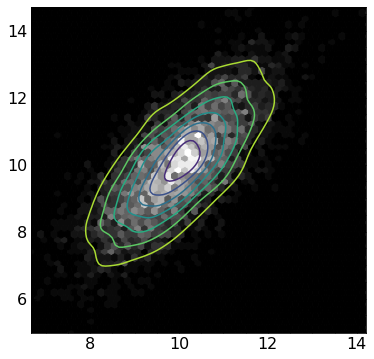

In [5]:
fig = plt.figure(figsize=(6,6))
ax0 = plt.subplot2grid((1,1),(0,0),fig=fig,rowspan=2)
ax0.hexbin(x,y,gridsize=50,cmap='gray')
ax0.contour(X,Y,Z,cmap='viridis_r',zorder=10)
ax0.set(xlim=(min(x),max(x)),ylim=(min(y),max(y)))
ax0.minorticks_on()
ax0.tick_params(axis='both', which='major', labelsize=16)
ax0.tick_params(axis='both', which='major', length=5)
ax0.tick_params(axis='both', which='minor', length=2.5)
ax0.tick_params(axis='both', which='both',direction='in',right=True,top=True)

## Other packages 1 - Corner

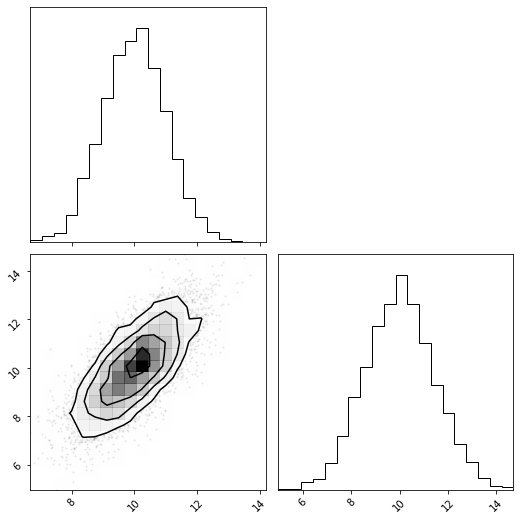

In [6]:
import corner
fig = plt.figure(figsize=(9,9))
corner.corner(list(zip(*([x,y]))),fig=fig);

## Other packages 2 - Seaborn

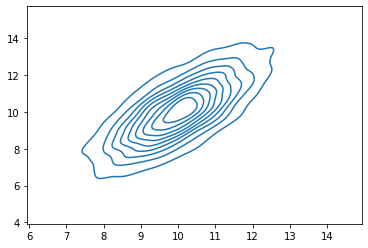

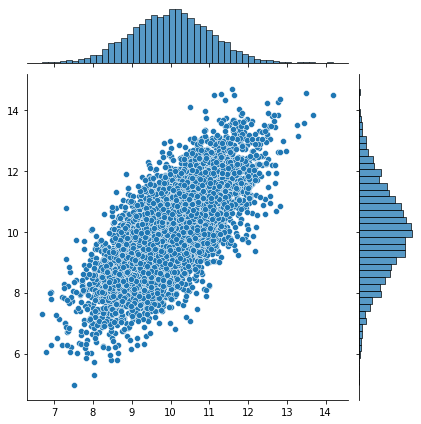

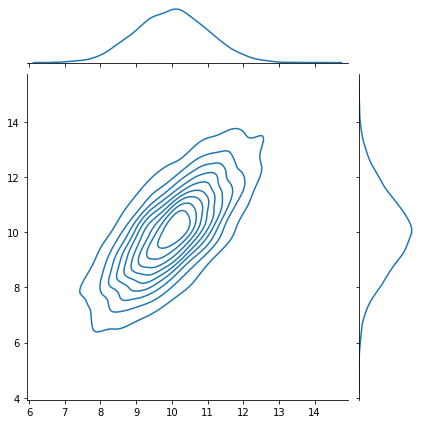

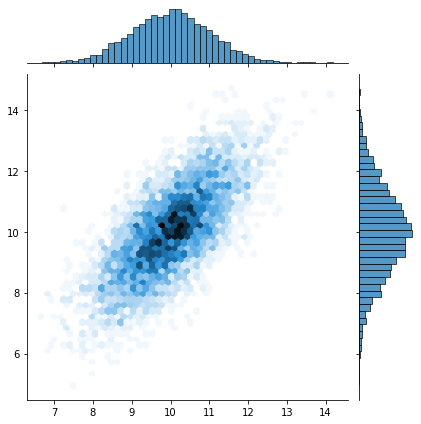

In [7]:
import seaborn as sb
sb.kdeplot(x=x,y=y)
sb.jointplot(x=x,y=y)
sb.jointplot(x=x,y=y,kind='kde')
sb.jointplot(x=x,y=y,kind='hex')